# Buying Breakouts In Silver SLV ETF

In [231]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark-palette')

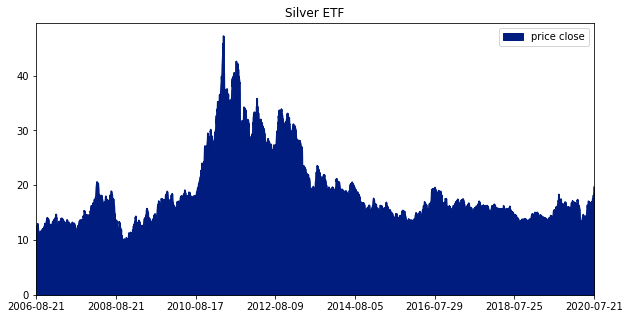

In [245]:
import eikon as tr
tr.set_app_key('DEFAULT_CODE_BOOK_APP_KEY')

df, e= tr.get_data(['SLV'],['tr.priceclose.date','tr.priceclose'],
                       {'SDate':'-3500','EDate':'0','Frq':'D'})

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) 
df.index = df.index.map(lambda t: t.strftime('%Y-%m-%d'))
df.columns = map(str.lower, df.columns)
df['price close'].plot(figsize=(10,5),kind='area',title='Silver ETF',legend=True);

In [252]:
df['dailyreturn'] = ((df['price close'] - df['price close'].shift(1))/df['price close'].shift(1)*100).round(2)

In [246]:
df = df.dropna()

In [247]:
df['shift1'] = df['price close'].shift(-1) 
df['shift10'] = df['price close'].shift(-10)
df['shift50'] = df['price close'].shift(-50) 
df['shift100'] = df['price close'].shift(-100)

In [248]:
df

,instrument,price close,shift1,shift10,shift50,shift100
2006-08-21,SLV,12.412,12.295,12.975,12.444,12.602
2006-08-22,SLV,12.295,12.500,12.988,12.515,12.801
2006-08-23,SLV,12.500,12.360,12.570,12.552,12.874
2006-08-24,SLV,12.360,12.420,12.130,12.610,13.249
2006-08-25,SLV,12.420,12.032,11.075,12.595,13.205
...,...,...,...,...,...,...
2020-07-15,SLV,18.170,17.780,NaN,NaN,NaN
2020-07-16,SLV,17.780,18.010,NaN,NaN,NaN
2020-07-17,SLV,18.010,18.530,NaN,NaN,NaN
2020-07-20,SLV,18.530,19.670,NaN,NaN,NaN


In [253]:
from sklearn.preprocessing import StandardScaler

dailyreturn = df[['dailyreturn']].values.reshape(-1,1)
scaler = StandardScaler()
returnscaled = scaler.fit(dailyreturn).transform(dailyreturn)

In [255]:
df['returnscaled'] = returnscaled

In [256]:
df1 = df[df['returnscaled']>3]

In [257]:
df1

,instrument,price close,shift1,shift10,shift50,shift100,dailyreturn,returnscaled
2008-03-25,SLV,17.775,18.225,17.507,16.64099,14.06,5.89,3.008580
2008-09-17,SLV,11.900,11.890,12.330,10.19000,12.98,14.42,7.389742
2008-09-22,SLV,13.350,13.180,10.750,9.49000,13.54,7.14,3.650602
2008-10-13,SLV,10.590,10.860,8.850,10.16000,12.77,8.06,4.123131
2008-10-29,SLV,9.670,9.680,9.170,10.50000,13.35,6.85,3.501653
2008-11-21,SLV,9.520,10.430,9.890,12.75000,11.89,7.45,3.809824
2008-11-24,SLV,10.430,10.190,9.700,12.91000,11.86,9.56,4.893558
2009-01-16,SLV,11.110,11.090,12.210,12.79000,15.13,5.91,3.018852
2011-04-27,SLV,47.000,47.260,34.390,35.75100,38.65,6.75,3.450291
2011-05-09,SLV,36.980,37.520,34.270,39.12000,29.96,7.25,3.707100


In [258]:
df1['return1'] = (df1['shift1'] - df1['price close'])/df1['price close']*100
df1['return10'] = (df1['shift10'] - df1['price close'])/df1['price close']*100
df1['return50'] = (df1['shift50'] - df1['price close'])/df1['price close']*100
df1['return100'] = (df1['shift100'] - df1['price close'])/df1['price close']*100

In [259]:
df1.round(2)

,instrument,price close,shift1,shift10,shift50,shift100,dailyreturn,returnscaled,return1,return10,return50,return100
2008-03-25,SLV,17.77,18.23,17.51,16.64,14.06,5.89,3.01,2.53,-1.51,-6.38,-20.90
2008-09-17,SLV,11.90,11.89,12.33,10.19,12.98,14.42,7.39,-0.08,3.61,-14.37,9.08
2008-09-22,SLV,13.35,13.18,10.75,9.49,13.54,7.14,3.65,-1.27,-19.48,-28.91,1.42
2008-10-13,SLV,10.59,10.86,8.85,10.16,12.77,8.06,4.12,2.55,-16.43,-4.06,20.59
2008-10-29,SLV,9.67,9.68,9.17,10.50,13.35,6.85,3.50,0.10,-5.17,8.58,38.06
2008-11-21,SLV,9.52,10.43,9.89,12.75,11.89,7.45,3.81,9.56,3.89,33.93,24.89
2008-11-24,SLV,10.43,10.19,9.70,12.91,11.86,9.56,4.89,-2.30,-7.00,23.78,13.71
2009-01-16,SLV,11.11,11.09,12.21,12.79,15.13,5.91,3.02,-0.18,9.90,15.12,36.18
2011-04-27,SLV,47.00,47.26,34.39,35.75,38.65,6.75,3.45,0.55,-26.83,-23.93,-17.77
2011-05-09,SLV,36.98,37.52,34.27,39.12,29.96,7.25,3.71,1.46,-7.33,5.79,-18.98


In [260]:
print('Price return in 1 day: ',np.mean(df1['return1']).round(2),'%')
print('Price return in 10 days: ',np.mean(df1['return10']).round(2),'%')
print('Price return in 50 days: ',np.mean(df1['return50']).round(2),'%')
print('Price return in 100 days: ',np.mean(df1['return100']).round(2),'%')

Price return in 1 day:  1.26 %
Price return in 10 days:  -3.18 %
Price return in 50 days:  5.07 %
Price return in 100 days:  5.13 %


Good luck with the Market! Guillaume, Fierce Research